In [1]:
import pandas as pd
df=pd.read_csv("dataset\CreditCardFaultPredictionDataset.csv")

LIMIT_BAL: This feature represents the credit limit assigned to the individual's credit card. It indicates the maximum amount of credit the person can utilize.

SEX: This feature represents the gender of the credit card holder. While gender itself may not directly impact credit card fault detection, it can be considered as a demographic factor that might have some influence on creditworthiness.

EDUCATION: This feature indicates the educational background of the credit card holder. It can provide insights into the person's level of education, which might indirectly correlate with their financial stability and ability to manage credit.

MARRIAGE: This feature represents the marital status of the credit card holder. Similar to gender, marital status can be a demographic factor that could potentially impact credit card fault detection.

AGE: This feature denotes the age of the credit card holder. Age can be an important factor in assessing creditworthiness as it often correlates with financial responsibility and stability.

PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6: These features represent the repayment status of the credit card for the past six months. The values indicate the payment status (e.g., -1 represents payment delay for one month, 0 represents payment on time, 1 represents payment delay for two months, and so on). These features are crucial in determining the payment behavior of the individual over time.

BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6: These features represent the amount of bill statement for the respective months. They provide information about the outstanding balance on the credit card at specific points in time.

PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6: These features represent the amount of payment made by the credit card holder for the respective months. They indicate the actual payments made to reduce the outstanding balance.

default payment next month: This is the target variable or the dependent variable that indicates whether the credit card holder defaulted on their payment in the following month (1 for default, 0 for no default). This is the variable that the credit card fault detection model aims to predict.

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [6]:
df.shape

(1001, 24)

In [7]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,1001.0,167532.467532,130587.921320,10000.0,50000.0,140000.0,240000.0,700000.0
SEX,1001.0,1.589411,0.492187,1.0,1.0,2.0,2.0,2.0
EDUCATION,1001.0,1.776224,0.750916,1.0,1.0,2.0,2.0,6.0
MARRIAGE,1001.0,1.604396,0.532298,0.0,1.0,2.0,2.0,3.0
AGE,1001.0,34.945055,9.219760,21.0,28.0,33.0,41.0,75.0
PAY_0,1001.0,-0.004995,1.173446,-2.0,-1.0,0.0,0.0,8.0
PAY_2,1001.0,-0.161838,1.228732,-2.0,-1.0,0.0,0.0,7.0
PAY_3,1001.0,-0.164835,1.262459,-2.0,-1.0,0.0,0.0,7.0
PAY_4,1001.0,-0.283716,1.184662,-2.0,-1.0,0.0,0.0,7.0
PAY_5,1001.0,-0.283716,1.170224,-2.0,-1.0,0.0,0.0,7.0


In [9]:
df = df.drop_duplicates()
df.shape

(1001, 24)

In [10]:
import seaborn as sns

<Axes: >

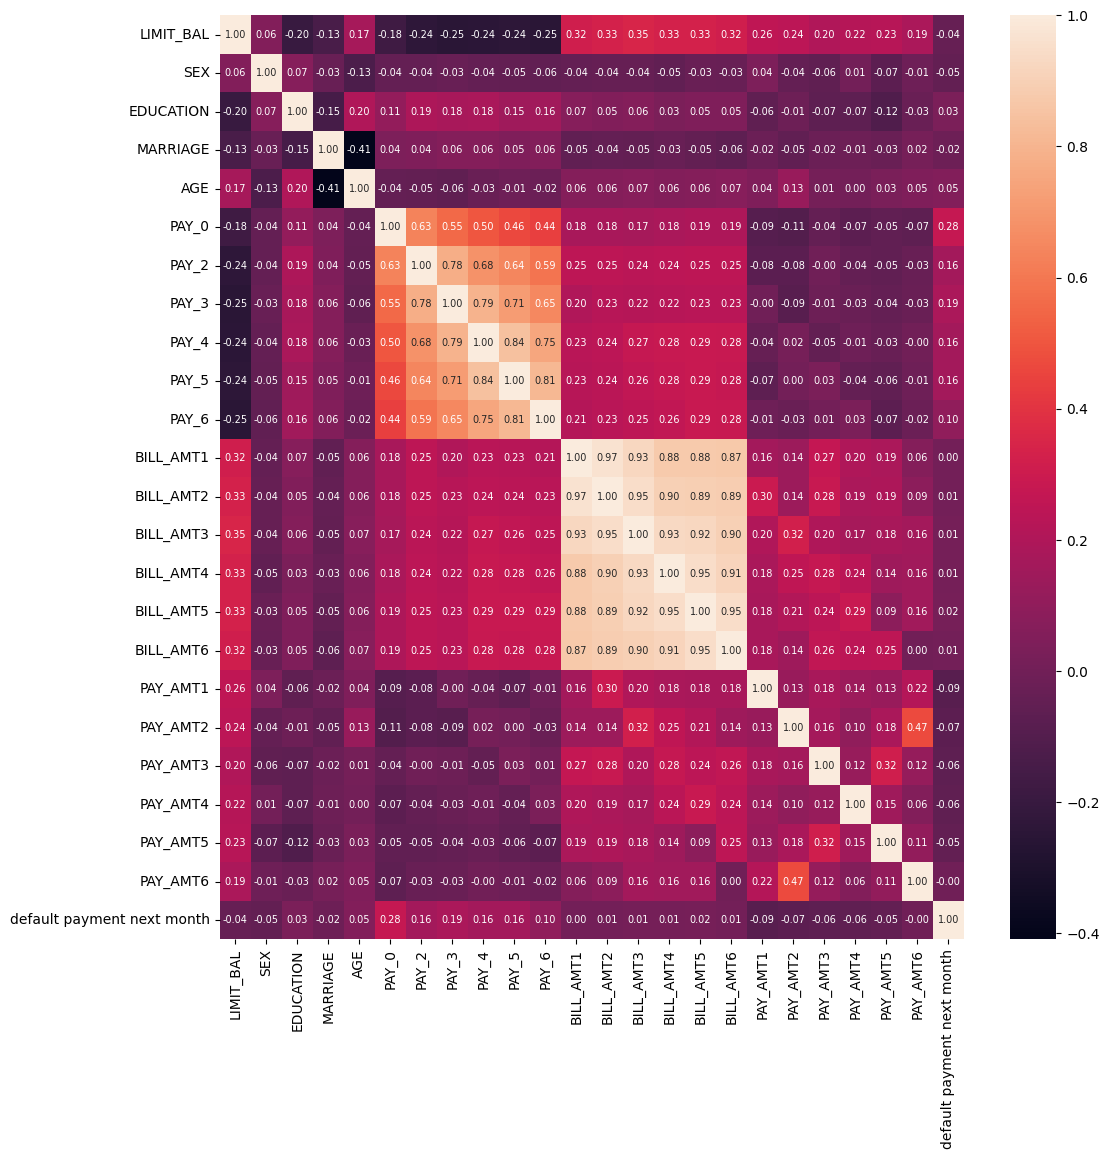

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt=".2f",annot_kws={"size":7})

* There are no null values and duplicate values in the dataset
* There is multicollinearity in our dataset (bill_mount1-bill_amount5) and also their collinearity with the target variable is very less

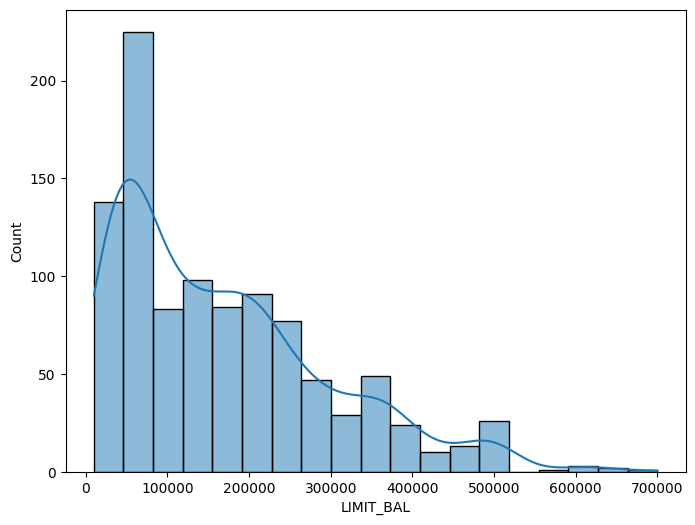

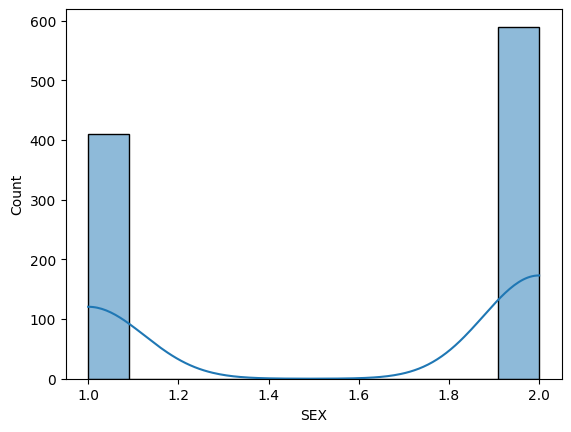

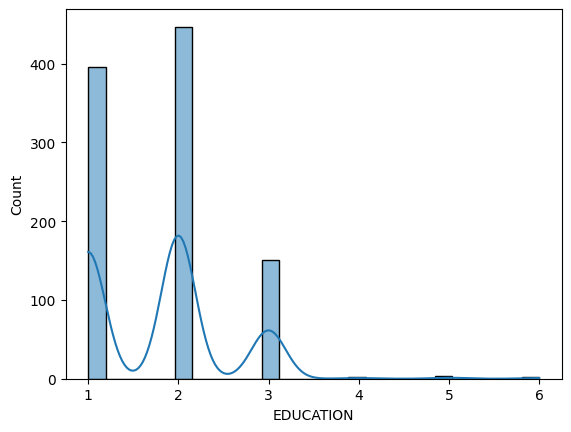

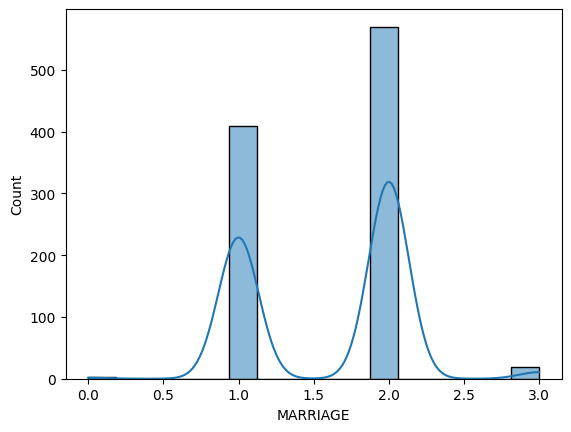

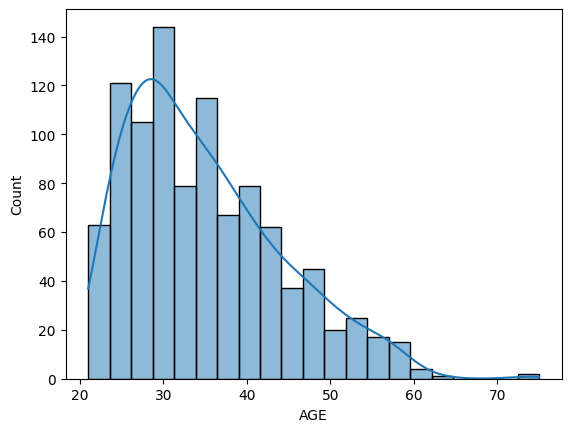

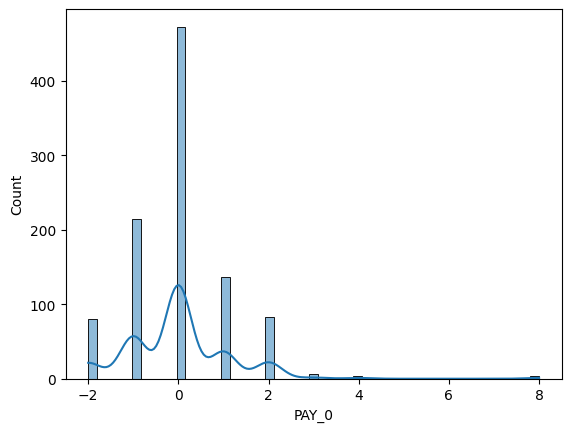

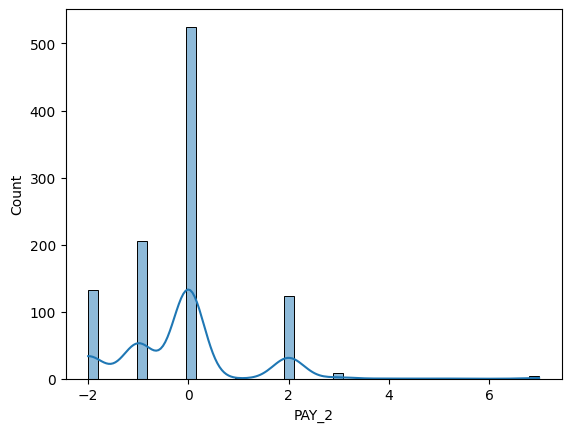

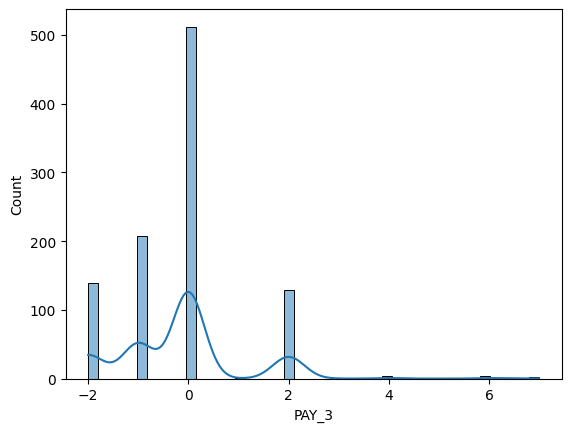

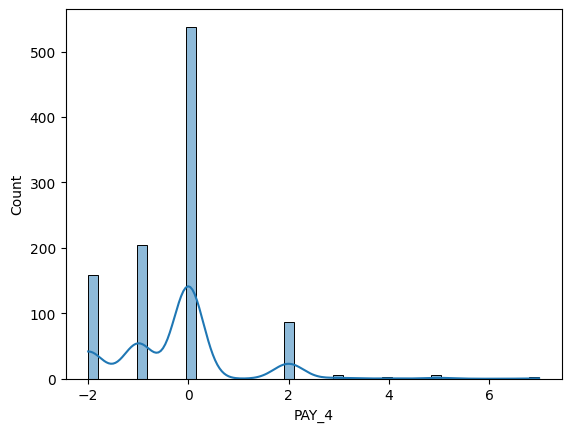

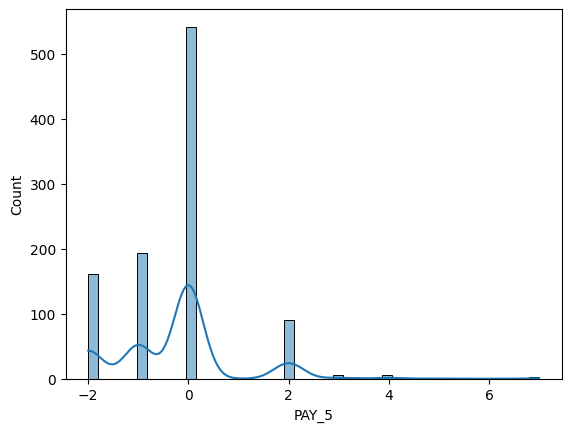

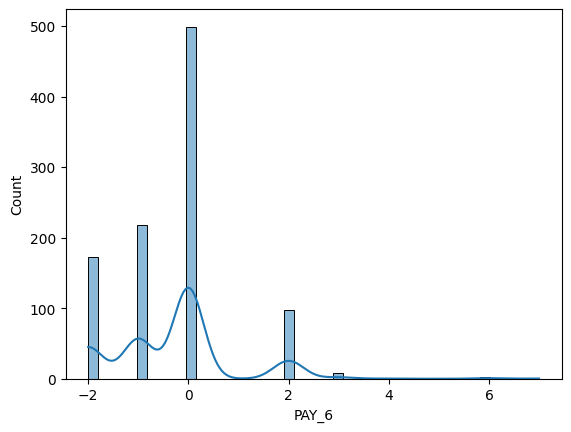

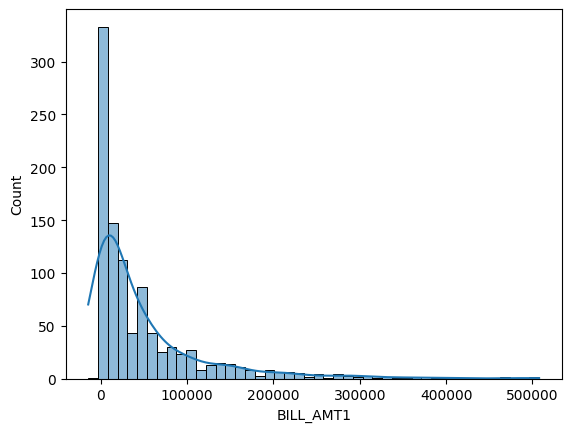

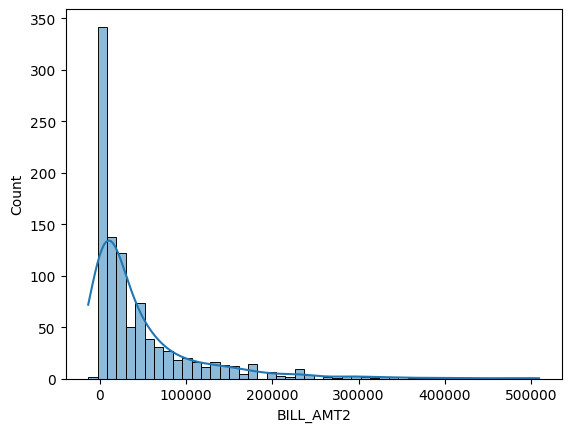

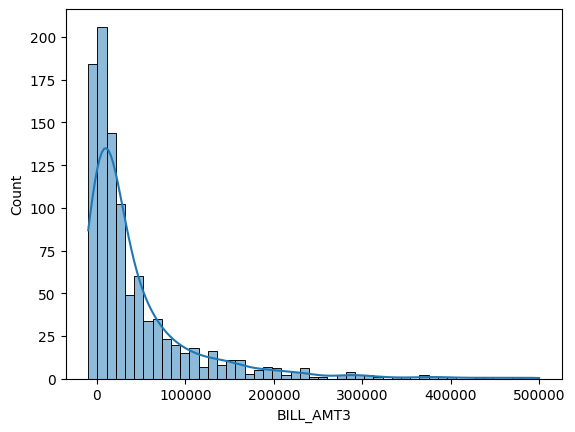

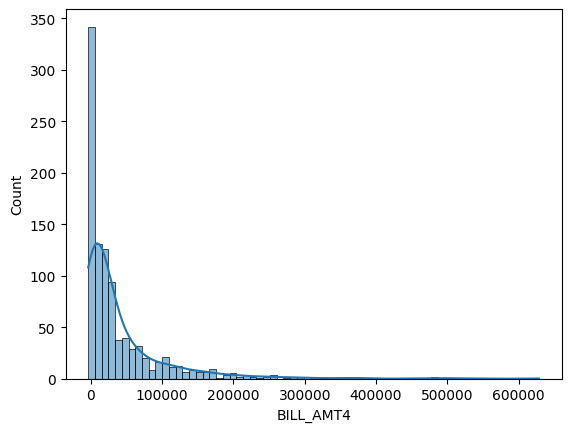

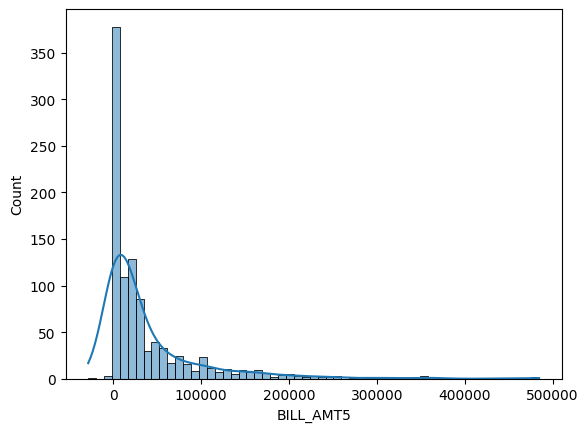

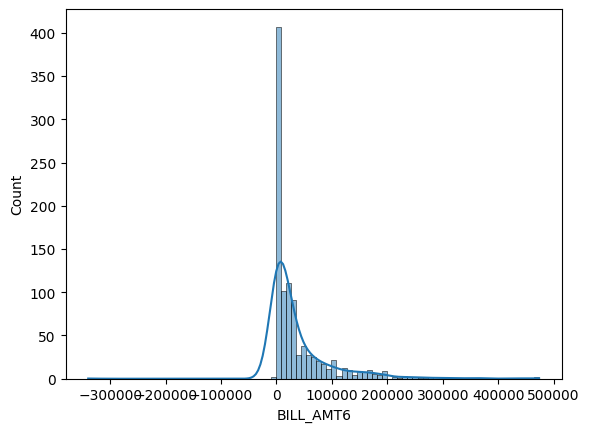

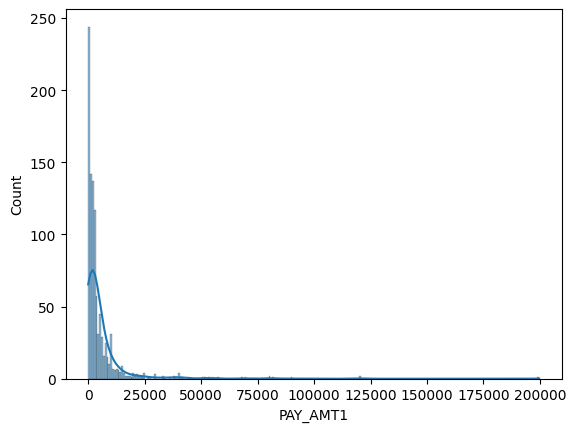

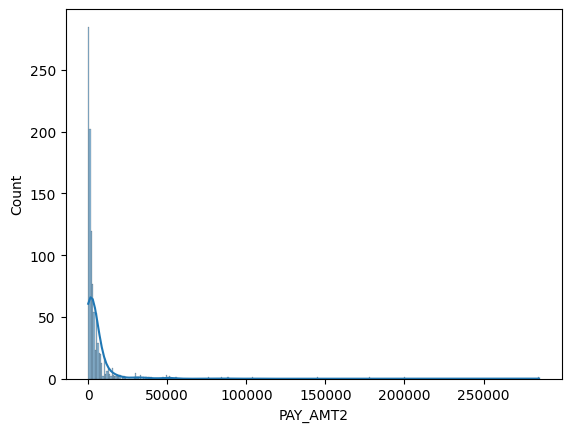

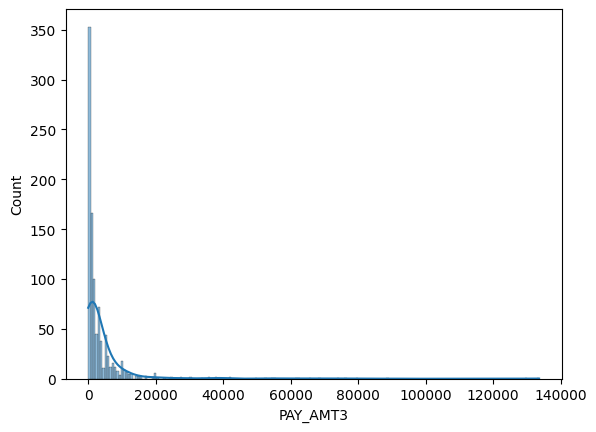

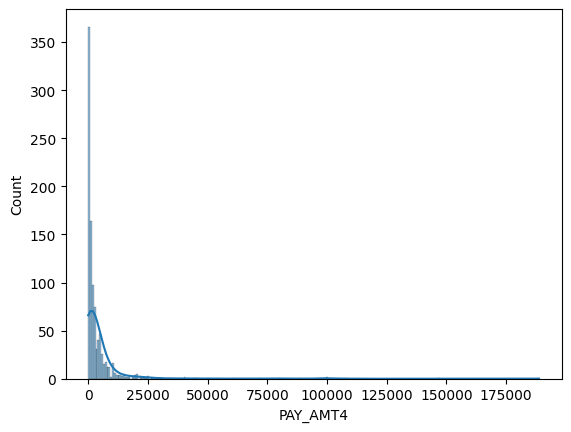

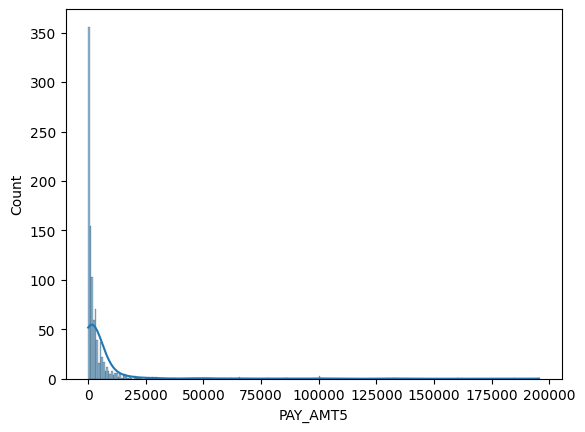

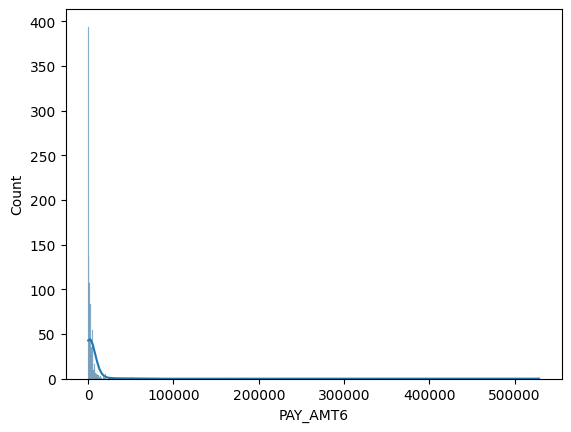

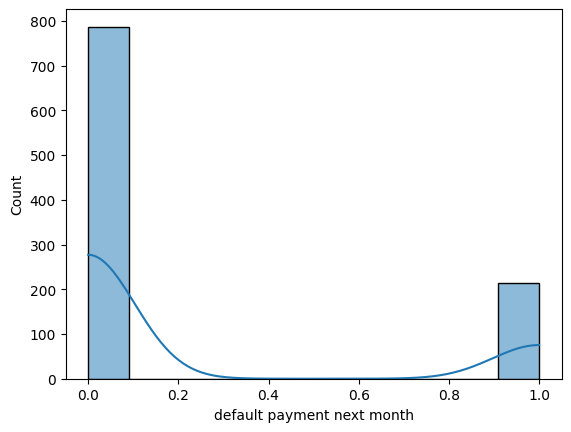

In [19]:
plt.figure(figsize=(8,6))
x=0
for i in df.columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [20]:
df["default payment next month"].value_counts()

default payment next month
0    787
1    214
Name: count, dtype: int64

In [2]:
X=df.drop(labels=["default payment next month"],axis=1)

In [3]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
1,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
2,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
3,100000,2,2,2,23,0,-1,-1,0,0,...,601,221,-159,567,380,601,0,581,1687,1542
4,140000,2,3,1,28,0,0,2,0,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000


In [4]:
y=df["default payment next month"]

In [5]:
numerical_cols = X.select_dtypes(exclude='object').columns

In [6]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [7]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

In [8]:
#Column Transformer
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline, numerical_cols)
])

In [9]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [43]:
X_train.head()

,num_pipeline__LIMIT_BAL,num_pipeline__SEX,num_pipeline__EDUCATION,num_pipeline__MARRIAGE,num_pipeline__AGE,num_pipeline__PAY_0,num_pipeline__PAY_2,num_pipeline__PAY_3,num_pipeline__PAY_4,num_pipeline__PAY_5,...,num_pipeline__BILL_AMT3,num_pipeline__BILL_AMT4,num_pipeline__BILL_AMT5,num_pipeline__BILL_AMT6,num_pipeline__PAY_AMT1,num_pipeline__PAY_AMT2,num_pipeline__PAY_AMT3,num_pipeline__PAY_AMT4,num_pipeline__PAY_AMT5,num_pipeline__PAY_AMT6
0,-0.703015,0.825599,0.363443,0.725387,-1.164541,0.004600,0.134065,0.127515,0.253938,0.260394,...,0.288295,0.191699,0.257645,0.300119,-0.214916,-0.162203,-0.219816,-0.164770,-0.134087,-0.104515
1,1.505967,-1.211241,0.363443,0.725387,-0.733814,0.004600,0.134065,0.127515,0.253938,0.260394,...,1.479871,0.095103,0.196971,0.190942,1.310394,0.524022,0.078980,0.374093,-0.076431,0.030515
2,-1.007702,0.825599,-1.013235,0.725387,1.419818,0.004600,0.134065,0.127515,0.253938,0.260394,...,-0.183571,-0.110384,-0.090993,-0.056432,-0.350299,-0.227174,-0.269616,-0.236619,-0.220571,-0.143095
3,-0.169812,0.825599,-1.013235,0.725387,-0.733814,0.867192,-1.514271,-1.466426,-1.469621,-1.475567,...,-0.667996,-0.606648,-0.639107,-0.611340,-0.494707,-0.332606,-0.419014,-0.344391,-0.288720,-0.200965
4,-0.093641,0.825599,-1.013235,0.725387,-0.733814,0.004600,0.134065,0.127515,0.253938,-0.607586,...,-0.263967,-0.503021,0.932436,0.708762,0.140869,-0.200817,-0.319415,6.816664,0.419410,0.184834


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [12]:
regression = LogisticRegression()
regression.fit(X_train,y_train)

LogisticRegression()

In [13]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    confusionmat = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    return accuracy,confusionmat,report

In [20]:
models={
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(max_depth=10),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "XGboost": XGBClassifier(max_depth = 10)
}
trained_model_list=[]
model_list=[]
accuracy_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    accuracy,confusionmat,report =evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    #print('Model Training Performance')
    print("\nConfusion Matrix:\n",confusionmat)
    print("\nClassification Report: \n\n",report)
    print("\nAccuracy:",accuracy*100)

    accuracy_list.append(accuracy)
    
    print('='*35)

Logistic Regression

Confusion Matrix:
 [[197   5]
 [ 43   6]]

Classification Report: 

               precision    recall  f1-score   support

           0       0.82      0.98      0.89       202
           1       0.55      0.12      0.20        49

    accuracy                           0.81       251
   macro avg       0.68      0.55      0.55       251
weighted avg       0.77      0.81      0.76       251


Accuracy: 80.87649402390437
Naive Bayes

Confusion Matrix:
 [[169  33]
 [ 27  22]]

Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.84      0.85       202
           1       0.40      0.45      0.42        49

    accuracy                           0.76       251
   macro avg       0.63      0.64      0.64       251
weighted avg       0.77      0.76      0.77       251


Accuracy: 76.09561752988047
Random Forest

Confusion Matrix:
 [[196   6]
 [ 38  11]]

Classification Report: 

               precision    recal

In [21]:
my_dict = dict(zip(model_list, accuracy_list))
my_dict

{'Logistic Regression': 0.8087649402390438,
 'Naive Bayes': 0.7609561752988048,
 'Random Forest': 0.8247011952191236,
 'Gradient Boosting': 0.8167330677290837,
 'Decision Tree': 0.7529880478087649,
 'XGboost': 0.8207171314741036}